# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [ ]:
Como obtener las calificaciones:
Según la cantidad de compras de ese producto, hacer un valor ponderado.


#### **Basado en contenidos**

Idea: recomendar ítems al usuario que sean similares a aquellos que
puntuó positivamente antes (o, en su defecto, que consumió).

1. Para cada ítem, debemos construir un perfil.
a. Casos sencillos: información fácilmente disponible. Películas: director, género,
actores, año, etc.
b. Casos no-sencillos. Debemos extraer features de los ítems. Noticias: hay que
usar la batería de herramientas de NLP (tf-idf, etc.)

2. Idealmente, también hay que construir un perfil de qué cosas le gustan al usuario.
3. Usamos una métrica de distancia para encontrar ítems similares.
a. Índice Jaccard
b. Distancia coseno
4. Recomendamos

In [1]:
### Importamos librerias
import gzip
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np




def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

**Reviews**

In [2]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse('data/steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1


In [3]:
data_reviews = pd.DataFrame(data_reviews)

In [4]:
if True:
    data_reviews.to_csv('data/data_reviews.csv', index= False)

#### Cargamos el dataset

In [31]:
data_reviews = pd.read_csv('data/data_reviews.csv')
data_reviews.head(5)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,7.656120e+16,Product received for free,NaN
4,the_maker988,8.2,18.0,35140,7,2018-01-02,"This game was way to linear for me, and compar...",False,1,7.656120e+16,NaN,NaN


We crawled reviews and game information from Steam. The dataset contains 7,793,069 reviews, 2,567,538 users, and 32,135 games. In addition to the review text, the data also includes the users' play hours in each review.

In [6]:
data_reviews.isna().sum()

username            18
hours             2637
products          1566
product_id           0
page_order           0
date                 0
text              1839
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

In [7]:
## Tamaño del dataset
data_reviews.shape

(779307, 12)

In [8]:
### Cantidad de valoraciónes de un juego especifico
data_reviews[data_reviews.product_id == '35140']

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny


**Games**

In [30]:
data_games = []
for l in parse('data/steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [31]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [32]:
data_games[data_games.id == '35140']

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31617,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,35140,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [33]:
data_games.isna().sum()

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

In [34]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  object 
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(14)
memory usage: 3.7+ MB


In [35]:
## Tamaño del dataset
data_games.shape

(32135, 16)

In [36]:
#Don't drop, just take the rows where EPS is not NA:
data_games = data_games[data_games['id'].notna()]
data_games['id'] = data_games['id'].astype('int')
data_games.reset_index(inplace=True)

#### Seleccionamos las features relevantes de los dataset para posterior hacer un merge entre ambos y trabajar con uno solo

In [37]:
data_reviews = data_reviews[['product_id','username', 'hours', 'products']]

In [42]:
data_games = data_games[['id','app_name','price','genres','tags','specs']]

In [43]:
data_reviews.head(3)

,product_id,username,hours,products
0,725280,Chaos Syren,0.1,41.0
1,328100,Ariman1,13.2,1386.0
2,725280,freakfantom,0.1,1706.0


In [44]:
data_games.head(3)

,id,app_name,price,genres,tags,specs
0,761140,Lost Summoner Kitty,4.99,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player]
1,643980,Ironbound,Free To Play,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla..."
2,670290,Real Pool 3D - Poolians,Free to Play,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla..."


#### Realizo merge de los dos dataset

Agregamos al dataset el nombre del Juego, se utiliza la columna en común que identifica a los juegos en ambos dataset, product_id y id

In [45]:
#https://interactivechaos.com/es/manual/tutorial-de-pandas/dataframes-la-funcion-merge
mergeado = pd.merge(data_reviews,data_games, left_on = "product_id", right_on = "id")
mergeado.drop('id', axis=1, inplace=True)
mergeado.head()

,product_id,username,hours,products,app_name,price,genres,tags,specs
0,725280,Chaos Syren,0.1,41.0,Psi Project,2.99,"[Action, Adventure, Indie, Simulation]","[Action, Adventure, Indie, Simulation]","[Single-player, Steam Trading Cards]"
1,725280,freakfantom,0.1,1706.0,Psi Project,2.99,"[Action, Adventure, Indie, Simulation]","[Action, Adventure, Indie, Simulation]","[Single-player, Steam Trading Cards]"
2,328100,Ariman1,13.2,1386.0,Gunspell - Steam Edition,14.99,"[Adventure, Indie, RPG]","[Adventure, RPG, Indie, Puzzle, Match 3]",[Single-player]
3,328100,dll3z,0.4,314.0,Gunspell - Steam Edition,14.99,"[Adventure, Indie, RPG]","[Adventure, RPG, Indie, Puzzle, Match 3]",[Single-player]
4,328100,Nyazicat,2.2,1224.0,Gunspell - Steam Edition,14.99,"[Adventure, Indie, RPG]","[Adventure, RPG, Indie, Puzzle, Match 3]",[Single-player]


In [46]:
if True:
    mergeado.to_csv('data/mergeado.csv', index= False)

#### Cargamos el Dataset, que ya contiene un merge con las reviews y games

In [3]:
df = pd.read_csv('data/mergeado.csv')
df.head(2)

,product_id,username,hours,products,app_name,price,genres,tags,specs
0,725280,Chaos Syren,0.1,41.0,Psi Project,2.99,"['Action', 'Adventure', 'Indie', 'Simulation']","['Action', 'Adventure', 'Indie', 'Simulation']","['Single-player', 'Steam Trading Cards']"
1,725280,freakfantom,0.1,1706.0,Psi Project,2.99,"['Action', 'Adventure', 'Indie', 'Simulation']","['Action', 'Adventure', 'Indie', 'Simulation']","['Single-player', 'Steam Trading Cards']"


In [4]:
## Tamaño del dataset
df.shape

(779951, 9)

In [5]:
df1 = df[['product_id','username','app_name','price','hours']]
df1

,product_id,username,app_name,price,hours
0,725280,Chaos Syren,Psi Project,2.99,0.1
1,725280,freakfantom,Psi Project,2.99,0.1
2,328100,Ariman1,Gunspell - Steam Edition,14.99,13.2
3,328100,dll3z,Gunspell - Steam Edition,14.99,0.4
4,328100,Nyazicat,Gunspell - Steam Edition,14.99,2.2
...,...,...,...,...,...
779946,518790,rt974,theHunter: Call of the Wild™,29.99,9.4
779947,518790,Fallenglory,theHunter: Call of the Wild™,29.99,35.8
779948,518790,GooseMan,theHunter: Call of the Wild™,29.99,32.4
779949,518790,lazyboy82,theHunter: Call of the Wild™,29.99,96.9


#### Número total de horas y número de usuarios por juego

In [10]:
# Compute the total number of hours and total number of users per game.

#user_count = df_data_users.loc[df_data_users[col_play] == 1]. \
#        groupby(col_game)[col_user].agg('count').sort_values(ascending=False)
user_count = df1.groupby('app_name')['username'].agg('count').sort_values(ascending=False) 
# hours_played = df_data_users.loc[df_data_users[col_play] == 1]. \
#        groupby(col_game)[col_hour].agg(np.sum).sort_values(ascending=False)
hours_played = df1.groupby('app_name')['hours'].agg(np.sum).sort_values(ascending=False) 

In [11]:
# Create dataframe of top most played games with total hours and total
    # users per game.
    
nb_games=20
df_top_hours_played = pd.DataFrame({'app_name': hours_played.index,
                                        'hours_played': hours_played.values,
                                        'user_count': user_count.values})[0:nb_games]

In [12]:
df_top_hours_played

,app_name,hours_played,user_count
0,Team Fortress 2,13306145.4,18373
1,Rust,4443474.6,10221
2,Warframe,3406654.9,7321
3,Garry's Mod,2629495.2,7113
4,Arma 3,2573904.2,5976
5,ARK: Survival Evolved,2275927.5,5710
6,Fallout 4,1635305.7,5518
7,Mount & Blade: Warband,1446695.2,5518
8,Counter-Strike: Source,1417299.9,5496
9,DayZ,1348023.4,5301


In [13]:
# Get column names from csv.
col_names = df1.columns
col_names

Index(['product_id', 'username', 'app_name', 'price', 'hours'], dtype='object')

In [14]:
# Mask criteria for box plot.
#mask_criteria = df1[col_game].isin(df_top_hours_played['game_name'])
df_box_plot = df1[['hours', 'app_name']]

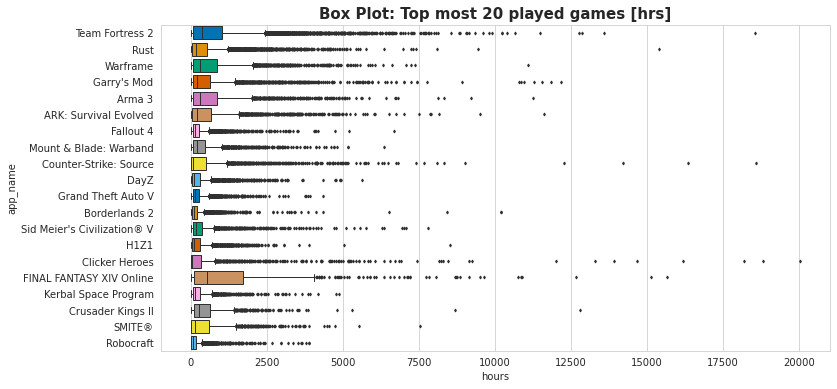

In [15]:
# Creación de box-plot.
fig_h = 1 + 0.25 * max(1, nb_games)
fig, ax = plt.subplots(figsize=(12, fig_h))
sns.set_style("whitegrid")
ax = sns.boxplot(x='hours', y='app_name', data=df_box_plot,
                 order=df_top_hours_played['app_name'].to_list(),
                 palette="colorblind",
                 saturation=1,
                 linewidth=1,
                 fliersize=2)
plt.title('Box Plot: Top most {} played games [hrs]'.format(nb_games),fontsize=15, fontweight='heavy')
#plt.xlabel('Hours', fontsize=13, fontweight='demi')
#plt.ylabel('Game', fontsize=13, fontweight='demi')
plt.show()


### **Implementación de Sistemas de Recomendación**

Objetivo:

Deacuerdo a la populariad del juego, similiritadad de la descripciónn del juego, la calidad del juego, y según las preferencias de los jugadores se le recomendaría un juego.

- Parte 1: Popularity-based recommendation System

#### **1) Popularity-based recommendation System**

Para los nuevo usuarios de la plataforma de Steam, no conocemos nada, la forma más eficiente para esos usuarios de hacerles conocer de la plataforma es de ofrecerles los juegos más populares según los usuarios previos. Además, estos juegos no tienen limitación de tiempo. Son los juegos juegos más populares desde el tiempo de su aparición en la plataforma.

1. Primero necesitamos extraer 'product_id','username','app_name','price', luego extraer la información del top 100 de los juegos.
2. Luego ordenamos los juegos en orden descendente acuerdo al número de propietarios (Es decir, que el juego con más propietarios, es el juego más popular)


#### Cantidad de videos Juegos por usuarios

In [4]:
df1 = df[['product_id','username','app_name','price']]

In [5]:
Pop_rec = df1.groupby(['username'], as_index=False)['product_id'].count()

In [6]:
#mergeado.groupby(['product_id'], as_index=False)['username'].count().sort_values(['username'], ascending=False).head(10)
#data2 = df.groupby(['username'], as_index=False)['product_id'].count().sort_values(['product_id'], ascending=False)
#data2 = df.groupby(['username'], as_index=False)['product_id'].count()

In [7]:
Pop_rec.rename(columns={'product_id': 'cnt_juegosxusuarios'}, inplace=True)
#data2.head(20).sort_values(['cnt_juegosxusuarios'], ascending=False).head(10)
Pop_rec.head(10)

,username,cnt_juegosxusuarios
0,!,1
1,! ZerZ,2
2,! ! ŦŕĩŽǿЯëќ™ ! !,1
3,! Alga,2
4,! DeadlyDeal !,1
5,! Dr Feelgood,1
6,! EREN,1
7,! GRIFFIS,1
8,! Monika !,2
9,! Taz the Husky,4


In [8]:
#Pop_rec.sort_values(['cnt_juegosxusuarios'], ascending=False).describe()

In [9]:
Pop_rec_sort = Pop_rec.sort_values(['cnt_juegosxusuarios'], ascending=False)
Pop_rec_sort.describe()

,cnt_juegosxusuarios
count,540338.000000
mean,1.443417
std,1.928097
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,213.000000


In [10]:
data_top = Pop_rec.sort_values(['cnt_juegosxusuarios'], ascending=False).head(100)

In [11]:
data_top.describe()

,cnt_juegosxusuarios
count,100.000000
mean,77.410000
std,28.921033
min,51.000000
25%,57.750000
50%,68.000000
75%,88.750000
max,213.000000


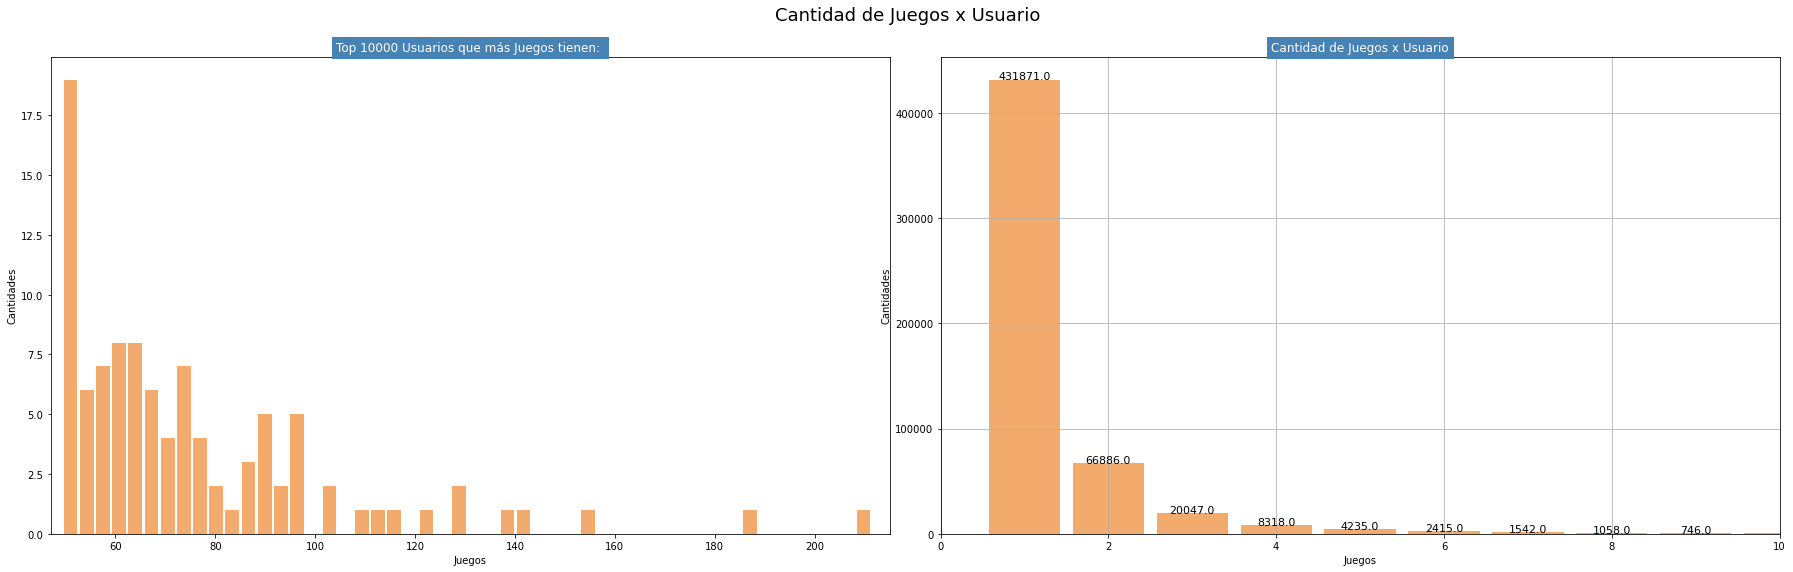

In [12]:
intervalos = range(min(Pop_rec_sort.cnt_juegosxusuarios), max(Pop_rec_sort.cnt_juegosxusuarios) + 2) #calculamos los extremos de los intervalos

## creamos la figura con subplots de 1 linea 2 columnas
fig, axes = plt.subplots(1,2, figsize=(25, 8))
fig.suptitle('Cantidad de Juegos x Usuario', fontsize=18)
#padding between subplots. Pass a float parameter to specify the amount of padding between subplots.
fig.tight_layout(pad=2.0)
plt.grid()

# Grafico 0
#sns.countplot(data = df, x = "price", orient='v', order = df['price'].value_counts().index)
axes[0].set_title("Top 10000 Usuarios que más Juegos tienen: ",fontsize = 12, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
axes[0].hist(x=data_top.cnt_juegosxusuarios, bins=50, color='#F2AB6D', rwidth=0.85, align='left')
#axes.set_title("Todas los tipos: ",fontsize = 10, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
#plt.sca(axes[0, 1])
#plt.sca(axes[0])
plt.xticks(rotation=45)
axes[0].set_xlabel("Juegos")
axes[0].set_ylabel("Cantidades")
axes[0].set_xlim([47,215]) ## limite en x, para acotar y quitar los outliers

#count=0
#for rect in axes[0].patches:
#    count +=1
#    if count < 12:  
#        # prints the quit message
#        #print(quit)
#        axes[0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)


#Grafico 1

axes[1].set_title("Cantidad de Juegos x Usuario",fontsize = 12, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
axes[1].hist(x=Pop_rec_sort.cnt_juegosxusuarios, bins=intervalos, color='#F2AB6D', rwidth=0.85, align='left')
#plt.sca(axes[0, 1])
#plt.sca(axes[0])
plt.xticks(rotation=0)
axes[1].set_xlabel("Juegos")
axes[1].set_ylabel("Cantidades")
axes[1].set_xlim([0,10]) ## limite en x, para acotar y quitar los outliers

count=0
for rect in axes[1].patches:
    count +=1
    if count < 10:  
        axes[1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

plt.show()

En el gráfico de la izaquieda observamos el top 10000 de los usuarios que han comprado más juego y su distribución. Se observa que el 67.8% ha comprado por 5 juegos, y 1.5% ha comprada 10 juegos. El gráfico de la derecha se grafica todos los datos, el 55% de los usuarios ha comprado 1 Juego, el 8.5% 2 Juegos y el 1% 3 Juegos.

In [13]:
#print('Popularity Based Model')

#### Juegos más populares 
A continuación se muestra el ranking de los juegos más populares en la plataforma Steam.

In [29]:
# relizamos conteno por nombre del juego y luego ordenamos de manera descendente
df_top = df1.app_name.value_counts().sort_values(ascending = False)

df_top = pd.DataFrame(df_top)
df_top['top_game'] = df_top.index
df_top.rename({'app_name': 'cnt'}, axis=1, inplace=True)
df_top.reset_index(drop=True, inplace=True)
df_top = df_top[['top_game','cnt']].sort_values(['cnt'], ascending=False)
df_top.head(10)

,top_game,cnt
0,Team Fortress 2,18373
1,Rust,10221
2,Borderlands 2,7321
3,Fallout 4,7113
4,Grand Theft Auto V,5976
5,Undertale,5710
6,Warframe,5518
7,Portal 2,5518
8,DayZ,5496
9,Robocraft,5301


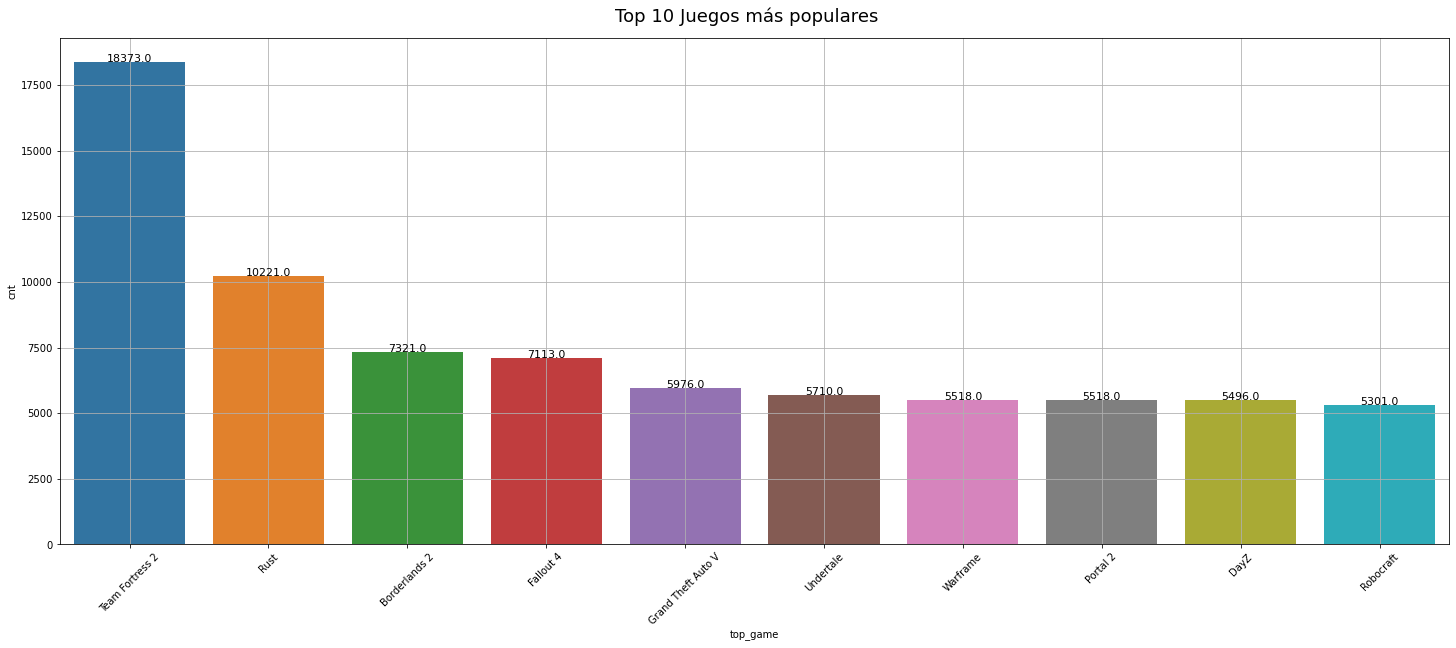

In [27]:
## creamos la figura con subplots de 1 linea 2 columnas
fig, axes = plt.subplots(1,1, figsize=(20, 8))
fig.suptitle('Top 10 Juegos más populares', fontsize=18)
#padding between subplots. Pass a float parameter to specify the amount of padding between subplots.
fig.tight_layout(pad=1.0)

# GRacount 0
#sns.countplot(data = df_top, x = "top_game", orient='v', ax=axes, order = df_top['cnt'].value_counts().index)
sns.barplot(x="top_game", y="cnt", ax=axes,orient="v", data=df_top.head(10))
#axes.set_title("Todas los tipos: ",fontsize = 10, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
#plt.sca(axes[0, 1])
plt.sca(axes)
plt.xticks(rotation=45)
plt.grid()

for rect in axes.patches:
    axes.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)


Es decir, a los clientes que recién ingresen a la plataforma se le recomendará los juegos más populares.

#### **2) Quality-based Recommendation**
Since Steam is a very comprehensive website, it’s straightforward that we can get the most popular games by their owners, which is a good start for a cold start user. But does this method satisfied by some common users? Maybe the answer is not “Yes”. Those popular games always have more users, more positive or negative reviews. From a business perspective, game owners are persuaded by the truth. They care more about the games’ quality rather than sale quantities. However, some games have more owners perhaps because of the propaganda of media, famous game studios as well as the Steam website itself. In general, online games always have more users than non-online games because of the cooperation of players for games. In common users’ perspectives, many of them care more about if this game got positive reviews by most users who leave their reviews. Therefore, the positive reviews rates of all the reviews(our definition of “Quality-based” here) could be a good evaluation of whether this game has good quality in users.

Top 10 games with most users’ reviews
1. We first also extract app_id, game names, owners' prices, positive reviews, and negative reviews. And then we stored them in the JSON, and listed all the reviews of each game respectively because app_id is immutable. In this way, we can observe the number of positive reviews and negative reviews of each game.
2. Next, we gather the reviews of each game and added two columns to the original data frame, which are the number of positive and negative reviews, but the number of positive and negative comments is independent, that is to say, if the number of positive reviews of A is relatively lower than that of Game B, but the total number of reviews of Game A is far lower than that of Game B. In this situation, it’s obvious that Game A has higher positive rates. In order to make the analysis more accurate and visible, we added a column of positive rate, that is, dividing the number of positive comments by the total number of comments, so that we can easily see a Proportion of good reviews in the product reviews.
At the end of this step, we sorted the games according to their favorable ratings. After sorting, the corresponding ID of the game remains unchanged.
The result is:


In [6]:
df1 = df[['product_id','username','app_name','price']]

In [ ]:
Pop_rec = df1.groupby(['product_id'], as_index=False)['price'].count().sort_values(['price'], ascending=False)

,product_id,price
0,35140,88
1,328100,7
2,631920,3
3,725280,2


In [10]:
Pop_rec = df1['product_id'].value_counts().head(100)
Pop_rec.head()
Pop_rec = pd.DataFrame(Pop_rec)
Pop_rec['product_top'] = Pop_rec.index
Pop_rec.rename({'product_id': 'cnt'}, axis=1, inplace=True)
Pop_rec.reset_index(drop=True, inplace=True)
Pop_rec = Pop_rec[['product_top','cnt']].sort_values(['cnt'], ascending=False)
Pop_rec.head(5)

,product_top,cnt
0,35140,88
1,328100,7
2,631920,3
3,725280,2


In [12]:
#data_games[data_games.id == '440']

<AxesSubplot:xlabel='product_top', ylabel='cnt'>

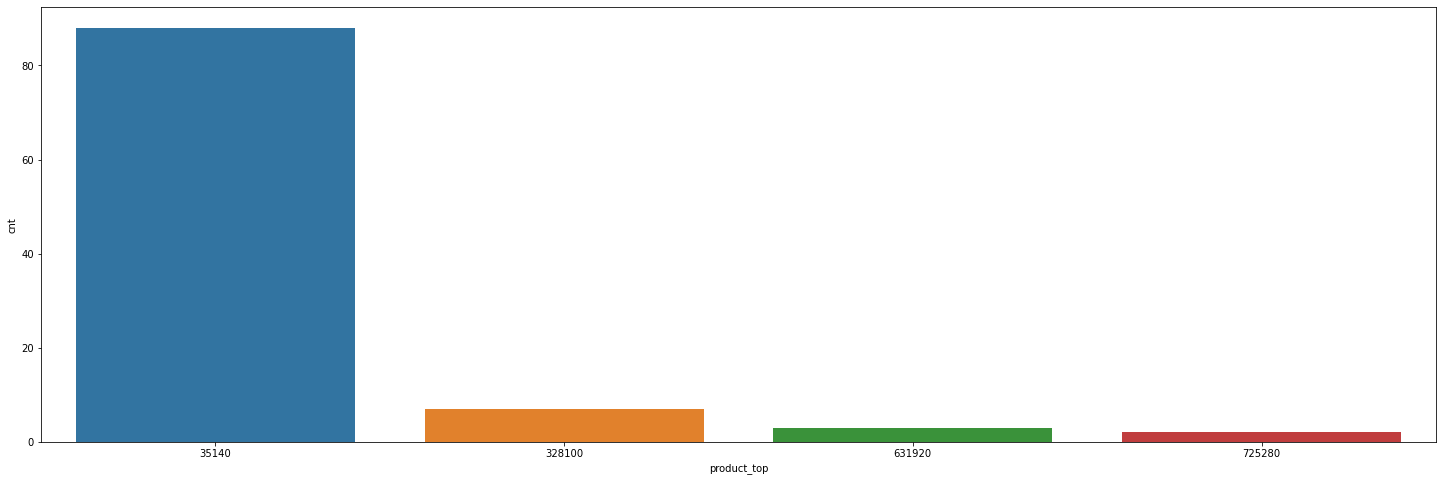

In [13]:
fig, axes = plt.subplots(1,1, figsize=(25, 8))
sns.barplot(x="product_top", y="cnt", data=Pop_rec)

In [10]:
#data_reviews_2 = data_reviews[['username','product_id']]
#data_reviews_2

In [11]:
#data_games.shape

In [12]:
#mergeado.head()

In [13]:
df[['username','product_id','title']]

,username,product_id,title
0,Chaos Syren,725280,Psi Project
1,freakfantom,725280,Psi Project
2,Ariman1,328100,Gunspell - Steam Edition
3,dll3z,328100,Gunspell - Steam Edition
4,Nyazicat,328100,Gunspell - Steam Edition
...,...,...,...
779946,rt974,518790,theHunter: Call of the Wild™
779947,Fallenglory,518790,theHunter: Call of the Wild™
779948,GooseMan,518790,theHunter: Call of the Wild™
779949,lazyboy82,518790,theHunter: Call of the Wild™


#### Pairplot para ver la distribución de todas las variables

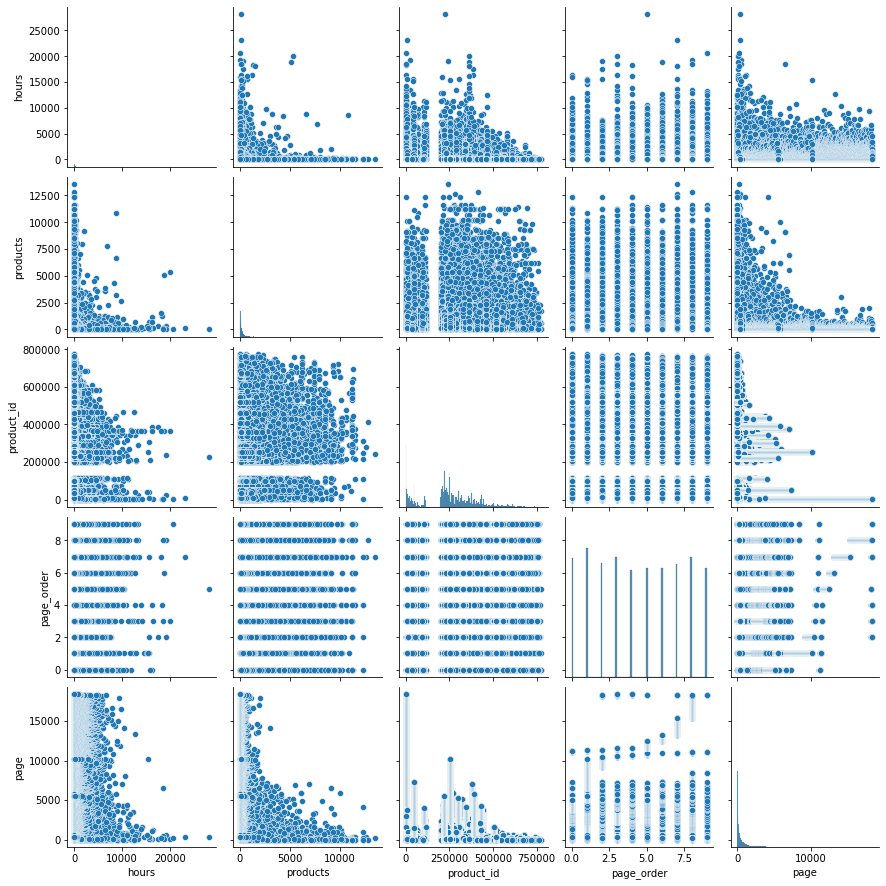

In [7]:
### vemos las ditribuciones de las variables
import seaborn as sns, numpy as np
#ax = sns.distplot(data_reviews['hours'])
dataplot = df[['hours','products','product_id','page_order','page']]
sns.pairplot(dataplot)

### Graficar
- Cantidad de video Juegos por usuarios
- Videos Juegos Vs Precios
- Top Juegos más vendidos

#### Videos Juegos Vs Precios

In [42]:
data2 = df.groupby(['product_id'], as_index=False)['price'].count().sort_values(['price'], ascending=False)

In [43]:
data2

,product_id,price
19,440,18373
2164,252490,10221
962,49520,7321
5873,377160,7113
2630,271590,5976
...,...,...
3841,317330,0
3772,314850,0
3741,314280,0
3614,310450,0


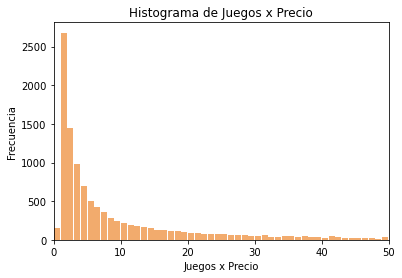

In [44]:
intervalos = range(min(data2.price.values), max(data2.price.values) + 2) #calculamos los extremos de los intervalos

plot.title('Histograma de Juegos x Precio')
#plot.hist(x=data2.cnt_juegosxusuarios, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.hist(x=data2.price.values, bins=intervalos, color='#F2AB6D', rwidth=0.90)
plot.xlim([0, 50])
plot.xlabel('Juegos x Precio')
plot.ylabel('Frecuencia')
#plot.xticks(intervalos)
#for rect in axes[0].patches:
#    axes[0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plot.show()

In [45]:
intervalos

range(0, 18375)

In [82]:
mergeado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779951 entries, 0 to 779950
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   username        779933 non-null  object 
 1   product_id      779951 non-null  int64  
 2   index           779951 non-null  int64  
 3   publisher       770463 non-null  object 
 4   genres          775928 non-null  object 
 5   app_name        779951 non-null  object 
 6   title           779951 non-null  object 
 7   url             779951 non-null  object 
 8   release_date    778840 non-null  object 
 9   tags            779947 non-null  object 
 10  discount_price  1359 non-null    float64
 11  reviews_url     779951 non-null  object 
 12  specs           775923 non-null  object 
 13  price           773278 non-null  object 
 14  early_access    779951 non-null  bool   
 15  id              779951 non-null  int64  
 16  developer       774163 non-null  object 
 17  sentiment 

In [46]:
df = mergeado.dropna(subset=['price'], inplace=False)
df['price'].value_counts()

19.99           152248
Free to Play    108397
9.99            102535
14.99            84039
29.99            53355
                 ...  
1.5                  1
11.15                1
1.59                 1
1.29                 1
399.0                1
Name: price, Length: 111, dtype: int64

In [47]:
df.shape

(773278, 27)

In [48]:
#df['price'] = df['price'].astype('int')
##data_games['id'] = data_games['id'].astype('int')
#df['price'] 
df[df["price"] == "0"].price.count()

0

In [50]:
# Obtenemos los valores que toma la variable price
df['price'].unique()

array([2.99, 14.99, 9.99, 19.99, 4.99, 0.99, 5.99, 11.99, 7.99, 3.99,
       'Free to Play', 29.99, 1.99, 18.99, 8.99, 39.99, 13.99, 6.99,
       'Free To Play', 'Free', 20.0, 59.99, 12.99, 15.99, 24.99,
       'Play for Free!', 1.87, 16.99, 49.99, 17.99, 44.99, 10.99, 5.65,
       99.99, 34.99, 64.99, 0.5, 0.89, 119.99, 0.49, 10.96, 1.29, 79.99,
       189.96, 74.99, 15.0, 2.97, 4.0, 11.15,
       'Play WARMACHINE: Tactics Demo', 4.68, 12.89, 'Play the Demo',
       54.99, 31.99, 'Free Mod', 49.0, 13.98, 44.98, 74.76, 32.99, 4.49,
       189.0, 0.98, 202.76, 61.99, 13.37, 3.0, 69.99, 'Free to Use', 1.59,
       87.94, 149.99, 'Install Now', 7.49, 16.06, 3.49, 19.98,
       'Free to Try', 3.33, 23.96, 21.99, 399.99, 6.66, 1.95, 19.95,
       'Starting at $449.00', 2.49, 139.92, 199.0, 23.99, 12.0, 1.0, 9.95,
       'Third-party', 2.0, 160.91, 20.99, 10.0, 299.99, 26.99, 1.5,
       'Free Movie', 399.0, 14.95, 29.96, 771.71, 59.95, 2.3,
       'Free HITMAN™ Holiday Pack', 6.48], dtype=o

In [51]:
#lista_free = ['Free To Play','Free','Play WARMACHINE: Tactics Demo', 'Install Now','Free to Try','Free Mod','Play WARMACHINE: Tactics Demo','Free HITMAN™ Holiday Pack','Free to Play','Play the Demo','Third-party','Free Movie']
#lista_cost = ['Starting at $449.00']
lista_free = ['Free to Play','Free To Play', 'Free','Play for Free!','Play WARMACHINE: Tactics Demo','Play the Demo','Free Mod','Free to Use','Install Now','Free to Try','Third-party','Free Movie', 'Free HITMAN™ Holiday Pack']
lista_cost = ['Starting at $449.00']

In [53]:
##df.reset_index(inplace=True)
#df2 = df.loc[df['price'].isin(lista_free)]
#df2.shape
##df['price'] = df.loc[df['price'].isin(lista_free)]

Convertimos los valores que machean en la lista lista_free en 0

In [54]:
#df.loc[df['price'] == lista_free, 'price'] = '0'
#df.reset_index(inplace=True)
df.loc[df["price"].isin(lista_free), "price"] = "0"
df[df["price"] == "0"].price.count()

/home/gonperez/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


148181

Seteamos el valor de price en el valor míninmo 449 del precio de jueo para los que están en la lista_cost

In [56]:
#df.loc[df['price'] == lista_cost, 'price'] = '449'
df.loc[df["price"].isin(lista_cost), "price"] = "449"

Convierto price de object to int

In [68]:
#df.reset_index(drop=True,inplace=True)
df = df.copy()
df['price'] = df['price'].astype('int')

In [80]:
df['price'].unique()

array([  2,  14,   9,  19,   4,   0,   5,  11,   7,   3,  29,   1,  18,
         8,  39,  13,   6,  20,  59,  12,  15,  24,  16,  49,  17,  44,
        10,  99,  34,  64, 119,  79, 189,  74,  54,  31,  32, 202,  61,
        69,  87, 149,  23,  21, 399, 449, 139, 199, 160, 299,  26, 771])

In [81]:
# Creo un dataframe con los Precios de los juegos
#df_prices = df['price'].unique()
#df_p = pd.DataFrame(df_prices)
#df_p = df_p.astype('int')
#df_p.sort_values(by=0)

Distribucion de los precios de los juegos

In [83]:
#sns.distplot(df_p)
#plot.xlim([0, 3000])
#sns.histplot(df_p)

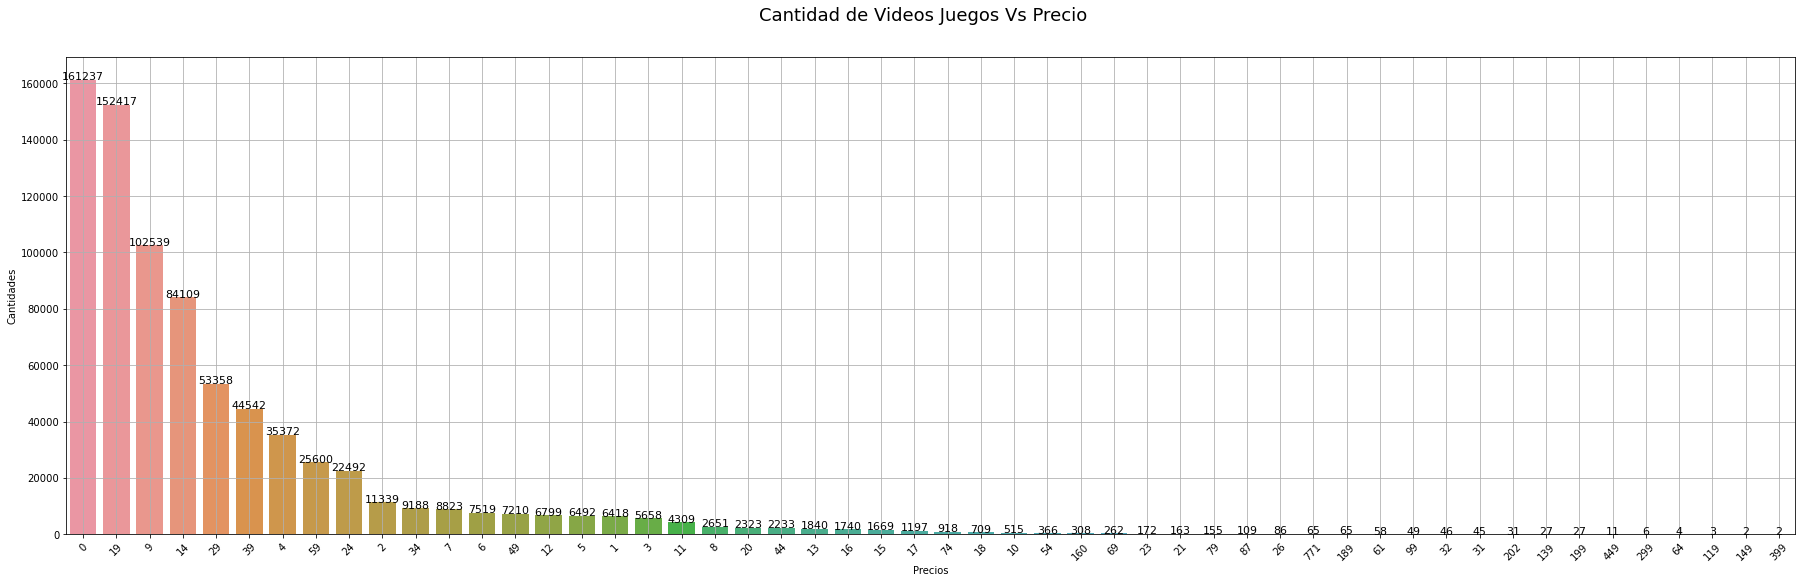

In [99]:
## creamos la figura con subplots de 1 linea 2 columnas
fig, axes = plt.subplots(1,1, figsize=(25, 8))
fig.suptitle('Cantidad de Videos Juegos Vs Precio', fontsize=18)
#padding between subplots. Pass a float parameter to specify the amount of padding between subplots.
fig.tight_layout(pad=2.0)

# GRacount 0
sns.countplot(data = df, x = "price", orient='v', order = df['price'].value_counts().index)
#axes.set_title("Todas los tipos: ",fontsize = 10, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
#plt.sca(axes[0, 1])
#plt.sca(axes[0])
plt.xticks(rotation=45)
axes.set_xlabel("Precios")
axes.set_ylabel("Cantidades")
plt.grid()

for rect in axes.patches:
    axes.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

#Grafico 1
#sns.countplot(data = df, x = "pr", orient='v', ax=axes[1], order = df['property_type_2'].value_counts().index)
#axes[1].set_title("Agrupados: ",fontsize = 10, color = "w", fontstretch=0, backgroundcolor="SteelBlue")
#plt.sca(axes[1])
#plt.xticks(rotation=45)
#plt.grid()

#for rect in axes[1].patches:
#    axes[1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

Se observa la ditribución de los precios de los juegos, los que figuran con valor 0, son los juegos free o demos

bineado de los precios de los juegos con rangos

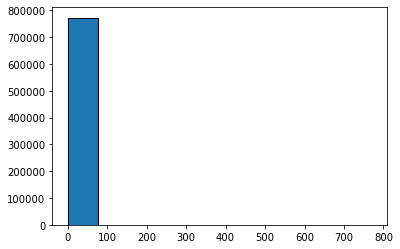

In [79]:
#create histogram with equal-width bins
n, bins, patches = plt.hist(df['price'], edgecolor='black')
plt.show()

#### Binary encoding:

In [73]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(df['price'])
#LabelBinarizer()
lb.classes_
lb.transform([1, 6])

TypeError: '<' not supported between instances of 'str' and 'float'

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773278 entries, 0 to 779950
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   username        773260 non-null  object 
 1   hours           770681 non-null  float64
 2   products        771745 non-null  float64
 3   product_id      773278 non-null  int64  
 4   page_order      773278 non-null  int64  
 5   date            773278 non-null  object 
 6   text            771448 non-null  object 
 7   early_access_x  773278 non-null  bool   
 8   page            773278 non-null  int64  
 9   user_id         314955 non-null  float64
 10  index           773278 non-null  int64  
 11  publisher       763853 non-null  object 
 12  genres          769272 non-null  object 
 13  app_name        773278 non-null  object 
 14  title           773278 non-null  object 
 15  url             773278 non-null  object 
 16  release_date    772167 non-null  object 
 17  tags      